<a href="https://colab.research.google.com/github/agustinparada/Fisica_Computacional_I/blob/master/Actividad5/Actividad5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Actividad 5***
José Agustín Parada Peralta.

Departamento de Física.

Universidad de Sonora.

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sb
import statsmodels.api as sm
%matplotlib inline

# ***Recabación de datos***
Desde el archivo de texto de los datos de la estación ubicado en *Github*

In [40]:
# Definimos la URL del archivo con los datos desde una página web, al igual que le asignamos los parámetros necesarios para su correcta lectura.
# También definimos el nombre de las columnas del dataframe.
url = 'https://raw.githubusercontent.com/agustinparada/Fisica_Computacional_I/master/Actividad1/10163.txt'

cols=['fecha', 'precip (mm)', 'evap (mm)', 'Tmax (°C)', 'Tmin (°C)']
df=pd.read_csv(url,names=cols,encoding='cp1251',skiprows=19,skipfooter=1,sep='\s+',header=None, engine='python')

# Creamos una copia de nuestra estructura de datos original para que, en caso de así requerirlo, poder ser capaces de tener un respaldo de los datos originales.
# Y procedemos a trabajar con la copia de los datos.
df_copi=df.copy()

# Reemplazaremos los valores string 'Nulo' presentes en el dataframe para reemplazarlos por vacíos.
# Asignamos a una nueva copia la estructura de los datos con los valores reemplazados.
valor='Nulo'
df_copi2=df_copi.replace(to_replace=valor, value='', regex=True)

# Convertimos los datos presentes en las columnas a lo que son, datos numéricos flotantes.
cols=['precip (mm)', 'evap (mm)', 'Tmax (°C)', 'Tmin (°C)']
for c in cols:
  df_copi2[c]=pd.to_numeric(df_copi2[c],errors='coerce')

# Creamos una copia nueva, de respaldo.
df_cop=df_copi2.copy()

# Ahora hagamos que detecte que el primer dato de fecha es el día.
df_cop['fecha']=pd.to_datetime(df_cop['fecha'],dayfirst=True).copy()

# Creamos dos columnas nuevas con los años y los meses (variables enteras).
df_cop['Año']=df_cop['fecha'].dt.year
df_cop['Mes']=df_cop['fecha'].dt.month
df_meteo=df_cop.copy()

#Reemplazamos, en el caso de los meses, sus números por sus palabras.
df_meteo.drop('Mes', axis=1, inplace=True)
df_meteo['Mes']=df_meteo['fecha'].dt.strftime('%b')

ciu='Cd. Lerdo, Durango'

# Ahora reemplazaremos los índices de los renglones con las fechas correspondientes.
df_meteo_ti=df_meteo.copy()
df_meteo_ti=df_meteo_ti.set_index('fecha')
print(df_meteo_ti)

            precip (mm)  evap (mm)  Tmax (°C)  Tmin (°C)   Año  Mes
fecha                                                              
1981-09-01          0.0        5.9       31.5       15.5  1981  Sep
1981-09-02          0.0        5.9       31.5       15.5  1981  Sep
1981-09-03          0.0        5.9       31.5       15.5  1981  Sep
1981-09-04          0.0        5.9       31.5       15.5  1981  Sep
1981-09-05          0.0        5.9       31.5       15.5  1981  Sep
...                 ...        ...        ...        ...   ...  ...
2013-12-27          0.0        NaN        9.0        5.0  2013  Dec
2013-12-28          0.0        NaN       17.0        5.0  2013  Dec
2013-12-29          0.0        NaN       21.0        4.0  2013  Dec
2013-12-30          0.0        NaN       10.0        7.0  2013  Dec
2013-12-31          0.0        NaN       21.0        3.0  2013  Dec

[9935 rows x 6 columns]


In [41]:
# Agrupamos los últimos 30 años, aproximadamente, de los datos:
df_meteo30=df_meteo_ti[(df_meteo_ti['Año']>=1990) & (df_meteo_ti['Año']<2014)]

# Cambiamos el nombre de las columnas para hacer más sencilla la referencia a ellas.
Columnas=['Precip', 'Evap', 'Tmax', 'Tmin', 'Año', 'Mes']
df_meteo30.columns=Columnas
print(df_meteo30)

            Precip  Evap  Tmax  Tmin   Año  Mes
fecha                                          
1990-01-01     8.2   1.3  11.0   8.0  1990  Jan
1990-01-02     0.0   1.7  20.0   7.5  1990  Jan
1990-01-03     0.0   6.0  28.0   8.0  1990  Jan
1990-01-04     0.0   2.1  20.5   9.5  1990  Jan
1990-01-05     4.1   1.3  14.0   9.5  1990  Jan
...            ...   ...   ...   ...   ...  ...
2013-12-27     0.0   NaN   9.0   5.0  2013  Dec
2013-12-28     0.0   NaN  17.0   5.0  2013  Dec
2013-12-29     0.0   NaN  21.0   4.0  2013  Dec
2013-12-30     0.0   NaN  10.0   7.0  2013  Dec
2013-12-31     0.0   NaN  21.0   3.0  2013  Dec

[8304 rows x 6 columns]


# ***Visualización de las series de tiempo en gráficos***


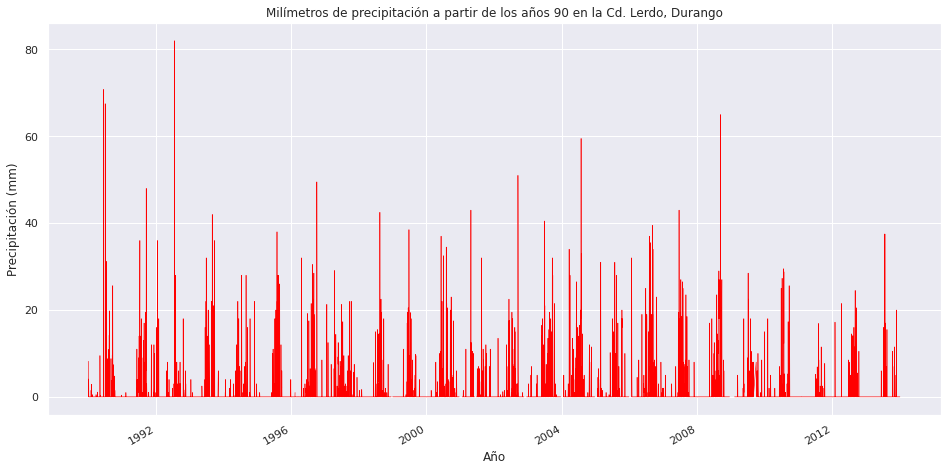

In [42]:
# Graficamos la serie de tiempo de precipitación
sb.set(rc={'figure.figsize':(16,8)})
df_meteo30['Precip'].plot(linewidth=0.6, color='red')
plt.xlabel('Año')
plt.ylabel('Precipitación (mm)')
plt.title('Milímetros de precipitación a partir de los años 90 en la '+ciu)
plt.show()

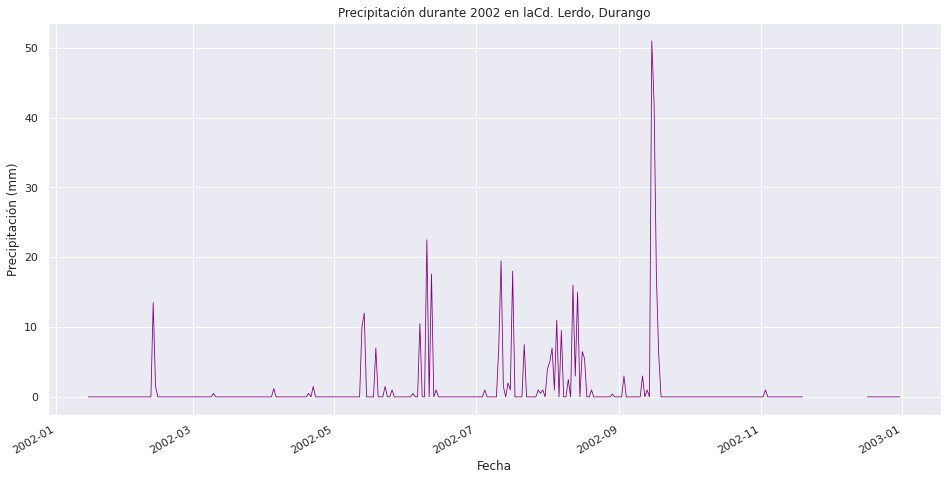

In [43]:
# Graficamos la serie de tiempo de precipitación correspondiente a un año
ax1=df_meteo30.loc['2002','Precip'].plot(linewidth=0.8, color='purple')
ax1.set_ylabel('Precipitación (mm)')
ax1.set_xlabel('Fecha')
plt.title('Precipitación durante 2002 en la'+ciu)
plt.show()

Text(0, 0.5, 'Precipitación (mm)')

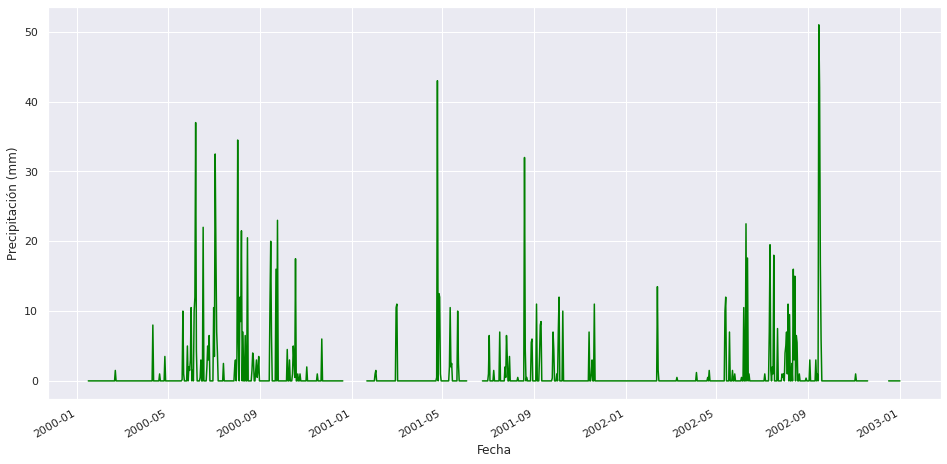

In [44]:
# Graficamos la serie de tiempo de precipitación correspondiente a un cierto periodo de tiempo
ax2=df_meteo30.loc['2000-01-01':'2003-01-01','Precip'].plot(color='green')
ax2.set_xlabel('Fecha')
ax2.set_ylabel('Precipitación (mm)')

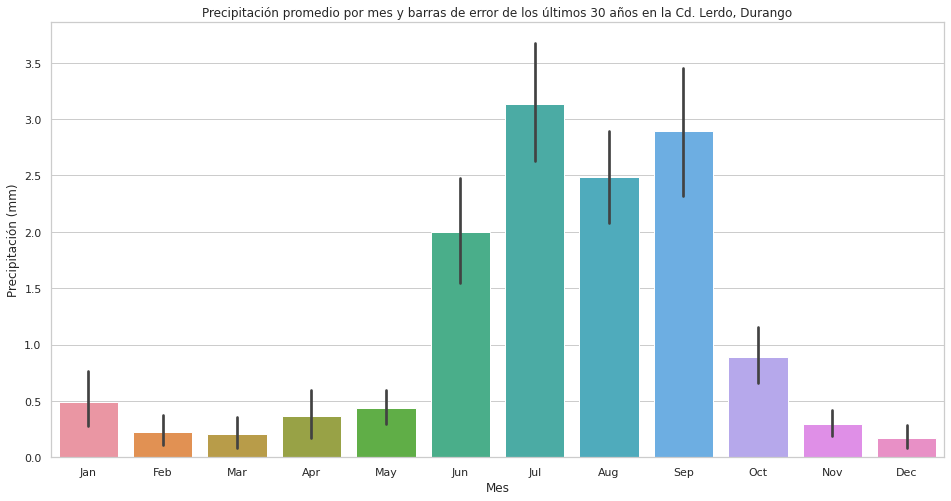

In [45]:
# Graficamos los mm de precipitación con sus barras de error correspondiente a cada mes
sb.set_style('whitegrid')
sb.barplot(data=df_meteo30, x='Mes', y='Precip')
plt.xlabel('Mes')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación promedio por mes y barras de error de los últimos 30 años en la '+ciu)
plt.show()

In [46]:
# Purgamos los datos desde 1990
df_meteo90=df_meteo_ti[(df_meteo_ti['Año']>=1990)&(df_meteo_ti['Año']<2014)]
df_meteo90.columns=Columnas
print(df_meteo90)

            Precip  Evap  Tmax  Tmin   Año  Mes
fecha                                          
1990-01-01     8.2   1.3  11.0   8.0  1990  Jan
1990-01-02     0.0   1.7  20.0   7.5  1990  Jan
1990-01-03     0.0   6.0  28.0   8.0  1990  Jan
1990-01-04     0.0   2.1  20.5   9.5  1990  Jan
1990-01-05     4.1   1.3  14.0   9.5  1990  Jan
...            ...   ...   ...   ...   ...  ...
2013-12-27     0.0   NaN   9.0   5.0  2013  Dec
2013-12-28     0.0   NaN  17.0   5.0  2013  Dec
2013-12-29     0.0   NaN  21.0   4.0  2013  Dec
2013-12-30     0.0   NaN  10.0   7.0  2013  Dec
2013-12-31     0.0   NaN  21.0   3.0  2013  Dec

[8304 rows x 6 columns]


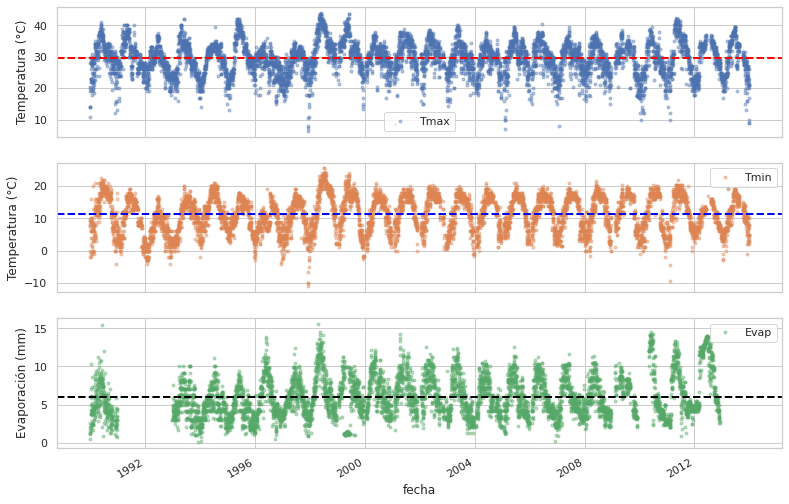

In [47]:
#Hacemos subgráficas de las temperaturas y evaporacón

colsplot=['Tmax','Tmin','Evap']

Tmax_me90=df_meteo90['Tmax'].mean()
Tmin_me90=df_meteo90['Tmin'].mean()
Evap_me90=df_meteo90['Evap'].mean()
axes=df_meteo90[colsplot].plot(marker='.',alpha=0.4, linestyle='None', figsize=(13,9), subplots=True)

for i, ax in zip(colsplot,axes):
  if i=='Tmax':
    ax.axhline(Tmax_me90, color='red', linestyle='--', linewidth=2)
    ax.set_ylabel('Temperatura (°C)')
  elif i=='Tmin':
    ax.axhline(Tmin_me90, color='blue', linestyle='--', linewidth=2)
    ax.set_ylabel('Temperatura (°C)')
  elif i=='Evap':
    ax.axhline(Evap_me90, color='black', linestyle='--', linewidth=2)
    ax.set_ylabel('Evaporación (mm)')


Text(0.5, 0, 'Fecha')

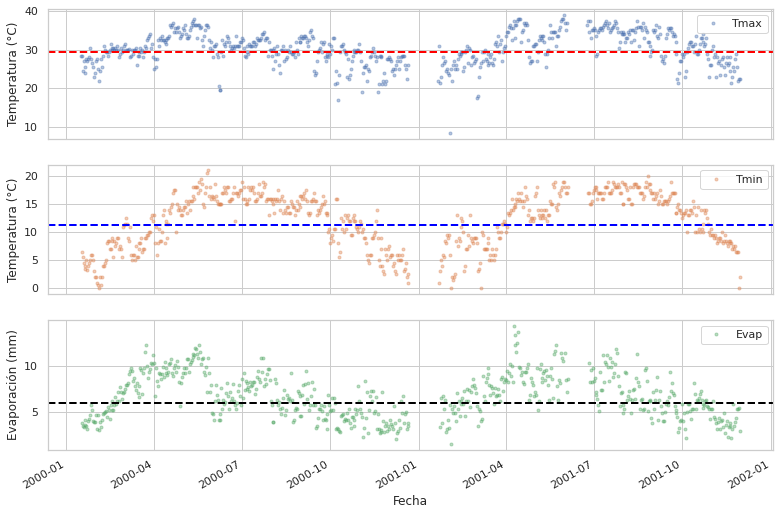

In [48]:
# Subgráficas de Temperaturas y evaporación durante 2000 y 2001

axes=df_meteo90[colsplot].loc['2000-01-01':'2002-01-01'].plot(marker='.',alpha=0.4, linestyle='None', figsize=(13,9), subplots=True)
for i, ax in zip(['Tmax', 'Tmin', 'Evap'],axes):
  if i=='Tmax':
    ax.axhline(Tmax_me90, color='red', linestyle='--', linewidth=2)
    ax.set_ylabel('Temperatura (°C)')
  elif i=='Tmin':
    ax.axhline(Tmin_me90, color='blue', linestyle='--', linewidth=2)
    ax.set_ylabel('Temperatura (°C)')
  elif i=='Evap':
    ax.axhline(Evap_me90, color='black', linestyle='--', linewidth=2)
    ax.set_ylabel('Evaporación (mm)')
plt.xlabel('Fecha')

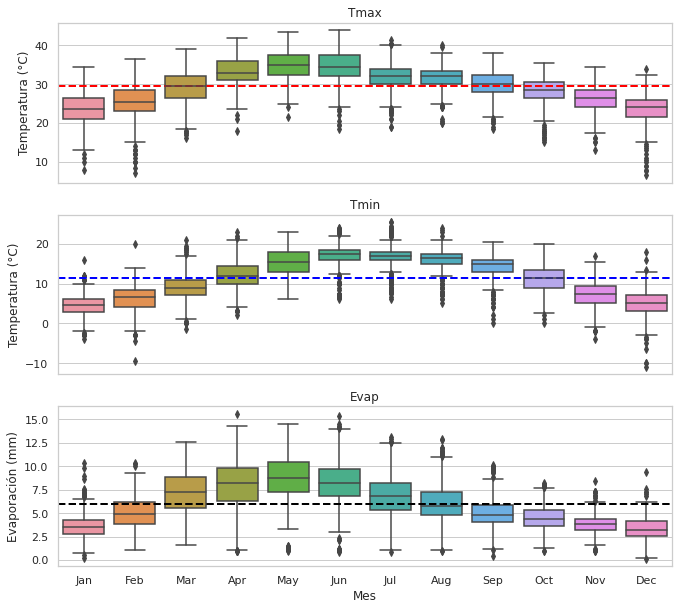

In [49]:
# Gráficas de barras de las temperaturas y evaporación.

fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)

for i, a in zip(['Tmax', 'Tmin', 'Evap'], axes):
  sb.boxplot(data=df_meteo90, x='Mes', y=i, ax=a)
  if i=='Tmax':
    a.axhline(Tmax_me90, color='red', linestyle='--', linewidth=2)
    a.set_ylabel('Temperatura (°C)')
  elif i=='Tmin':
    a.axhline(Tmin_me90, color='blue', linestyle='--', linewidth=2)
    a.set_ylabel('Temperatura (°C)')
  elif i=='Evap':
    a.axhline(Evap_me90, color='black', linestyle='--', linewidth=2)
    a.set_ylabel('Evaporación (mm)')
  a.set_title(i)
  if a!= axes[-1]:
    a.set_xlabel('')  
# Elimina la etiqueta del eje x excepto la de la subgráfica de abajo 


In [50]:
# Creación de promedios móviles para suavizar la curva. Utilizmos promedios móviles de cada 7, 30 y 365 días.
colss=['Tmax', 'Tmin', 'Evap']
df_meteo90_M7d=df_meteo90[colss].rolling(7, center=True, min_periods=1).mean()
df_meteo90_M30d=df_meteo90[colss].rolling(30, center=True, min_periods=1).mean()
df_meteo90_M365d=df_meteo90[colss].rolling(365, center=True, min_periods=1).mean()

Text(0.5, 0, 'Fecha')

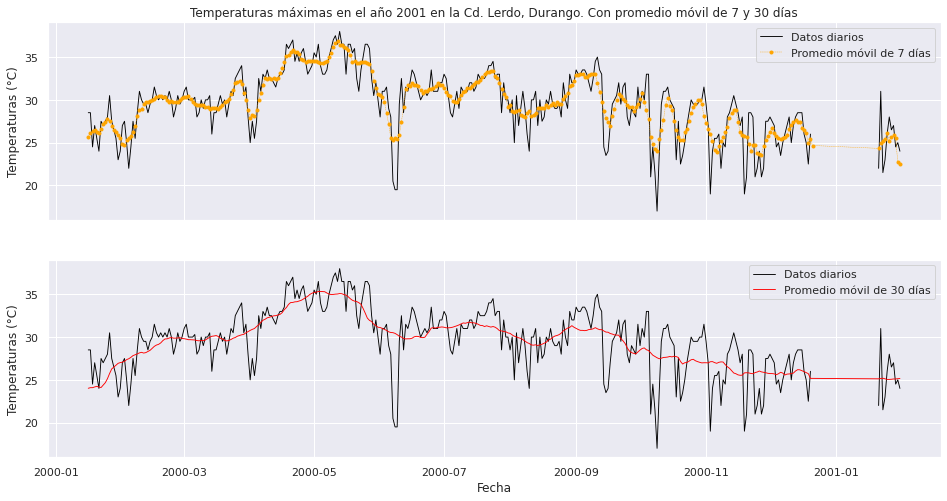

In [60]:
# Procedemos a crear ahora los gráficos de series de tiempo para las temperaturas máximas de un año.
inicio, fin = '2000-01', '2001-01'

#Ahora, construimos la gráfica de constratse con los datos y el promedio móvil de 30 días.
sb.set(rc={'figure.figsize':(16,8)})

fig, ax=plt.subplots(2,1, sharex=True)
for s, a in zip(['Tmax7', 'Tmax30'], ax):
  a.plot(df_meteo90.loc[inicio:fin, 'Tmax'], linestyle='-', color='black', linewidth=0.9, label='Datos diarios')
  a.set_ylabel('Temperaturas (°C)')
  
  if s=='Tmax7':
    a.plot(df_meteo90_M7d.loc[inicio:fin, 'Tmax'], marker='.', linestyle='--', linewidth=0.4, color='orange', label='Promedio móvil de 7 días')
  elif s=='Tmax30':
    a.plot(df_meteo90_M30d.loc[inicio:fin, 'Tmax'], linestyle='-', color='red', linewidth=0.9, label='Promedio móvil de 30 días')
  a.legend()
  if a != ax[-1]:
    a.set_title('Temperaturas máximas en el año 2001 en la '+ciu+'. Con promedio móvil de 7 y 30 días')


plt.xlabel('Fecha')



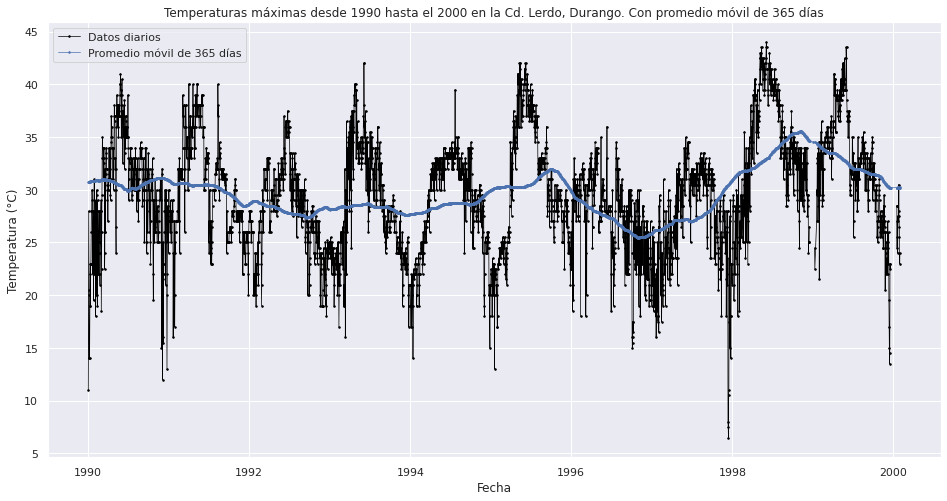

In [61]:
#Definimos un periodo de tiempo de 10 años para el análisis de las temperaturas máximas
inicio, fin = '1990-01', '2000-01'

#Ahora, construimos la gráfica de constratse con los datos y el promedio móvil de 365 días.
sb.set(rc={'figure.figsize':(16,8)})

fig, ax = plt.subplots()
ax.plot(df_meteo90.loc[inicio:fin, 'Tmax'],marker='.', markersize=3, linestyle='-', linewidth=0.7, color='black', label='Datos diarios')
ax.plot(df_meteo90_M365d.loc[inicio:fin, 'Tmax'], marker='.', markersize=3, linestyle='-', linewidth=0.7, label='Promedio móvil de 365 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Temperatura (°C)')
ax.set_title('Temperaturas máximas desde 1990 hasta el 2000 en la '+ciu+'. Con promedio móvil de 365 días')
ax.legend()

Text(0.5, 0, 'Fecha')

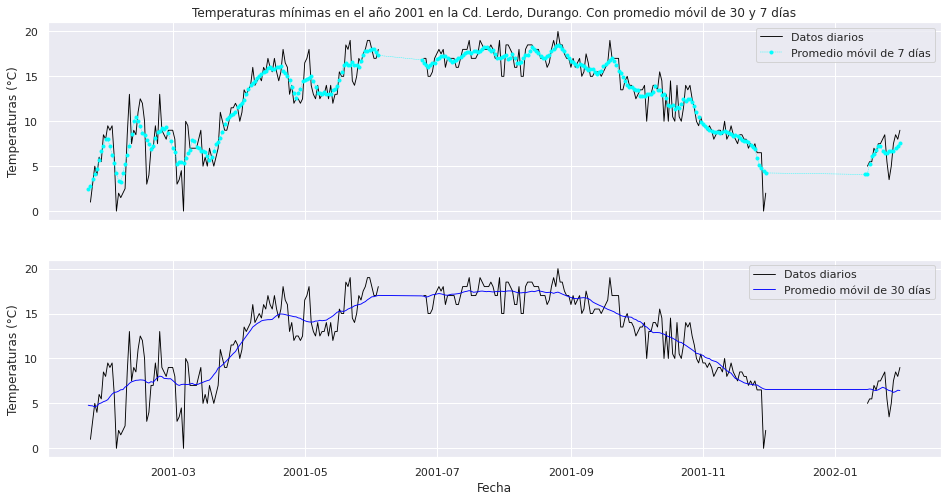

In [58]:
# Procedemos a crear ahora los gráficos de series de tiempo para las temperaturas mínimas de un año.
inicio, fin = '2001-01', '2002-01'

#Ahora, construimos la gráfica de constratse con los datos y el promedio móvil de 30 días.
sb.set(rc={'figure.figsize':(16,8)})

fig, ax=plt.subplots(2,1, sharex=True)
for s, a in zip(['Tmin7', 'Tmin30'], ax):
  a.plot(df_meteo90.loc[inicio:fin, 'Tmin'], linestyle='-', color='black', linewidth=0.9, label='Datos diarios')
  a.set_ylabel('Temperaturas (°C)')
  
  if s=='Tmin7':
    a.plot(df_meteo90_M7d.loc[inicio:fin, 'Tmin'], marker='.', linestyle='--', linewidth=0.4, color='cyan', label='Promedio móvil de 7 días')
  elif s=='Tmin30':
    a.plot(df_meteo90_M30d.loc[inicio:fin, 'Tmin'], linestyle='-', color='blue', linewidth=0.9, label='Promedio móvil de 30 días')
  a.legend()
  if a != ax[-1]:
    a.set_title('Temperaturas mínimas en el año 2001 en la '+ciu+'. Con promedio móvil de 30 y 7 días')

plt.xlabel('Fecha')


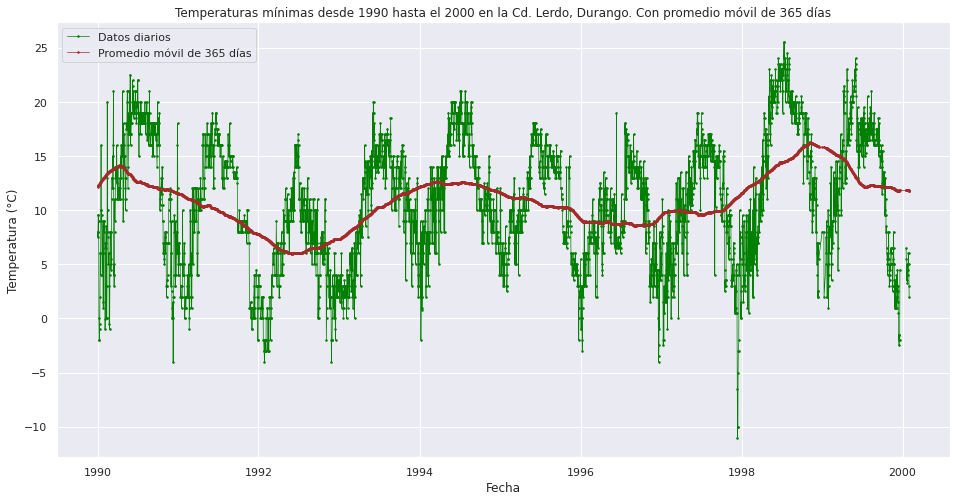

In [54]:
#Definimos un periodo de tiempo de 10 años para el análisis de las temperaturas mínimas
inicio, fin = '1990-01', '2000-01'

#Ahora, construimos la gráfica de constratse con los datos y el promedio móvil de 365 días.
sb.set(rc={'figure.figsize':(16,8)})

fig, ax = plt.subplots()
ax.plot(df_meteo90.loc[inicio:fin, 'Tmin'],marker='.', markersize=3, linestyle='-', linewidth=0.7, color='green', label='Datos diarios')
ax.plot(df_meteo90_M365d.loc[inicio:fin, 'Tmin'], marker='.', markersize=3, linestyle='-', color='brown',linewidth=0.7, label='Promedio móvil de 365 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Temperatura (°C)')
ax.set_title('Temperaturas mínimas desde 1990 hasta el 2000 en la '+ciu+'. Con promedio móvil de 365 días')
ax.legend()

Text(0.5, 0, 'Fecha')

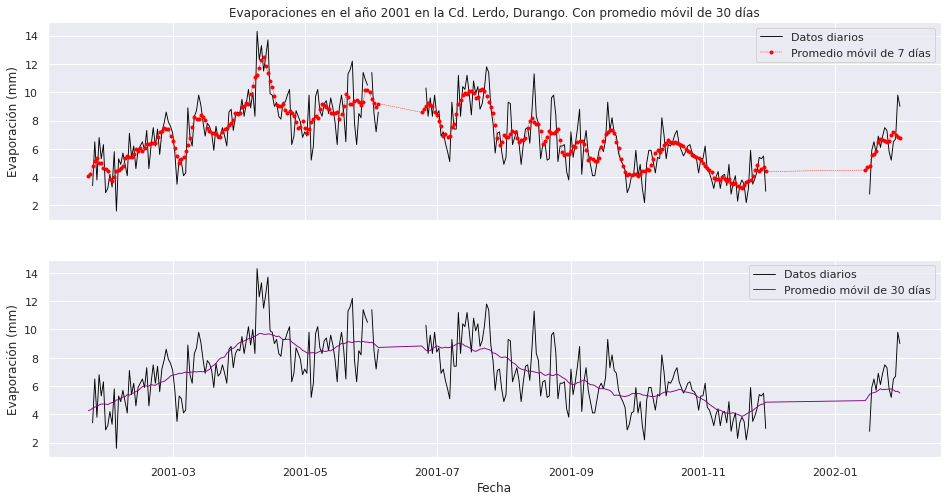

In [63]:
# Procedemos a crear ahora los gráficos de series de tiempo para las evaporaciones de un año.
inicio, fin = '2001-01', '2002-01'

#Ahora, construimos la gráfica de constratse con los datos y el promedio móvil de 30 días.
sb.set(rc={'figure.figsize':(16,8)})

fig, ax=plt.subplots(2,1, sharex=True)
for s, a in zip(['evap7', 'evap30'], ax):
  a.plot(df_meteo90.loc[inicio:fin, 'Evap'], linestyle='-', color='black', linewidth=0.9, label='Datos diarios')
  a.set_ylabel('Evaporación (mm)')
  if s=='evap7':
    a.plot(df_meteo90_M7d.loc[inicio:fin, 'Evap'], marker='.', linestyle='--', linewidth=0.4, color='red', label='Promedio móvil de 7 días')
  elif s=='evap30':
    a.plot(df_meteo90_M30d.loc[inicio:fin, 'Evap'], linestyle='-', color='purple', linewidth=0.9, label='Promedio móvil de 30 días')
  a.legend()
  if a != ax[-1]:
    a.set_title('Evaporaciones en el año 2001 en la '+ciu+'. Con promedio móvil de 30 días')

plt.xlabel('Fecha')

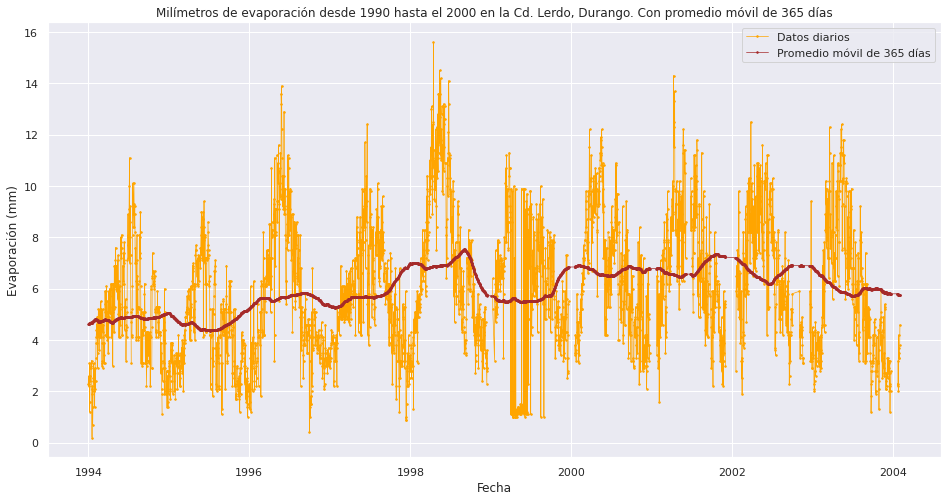

In [57]:
#Definimos un periodo de tiempo de 10 años para el análisis de la evaporación
inicio, fin = '1994-01', '2004-01'

#Ahora, construimos la gráfica de constratse con los datos y el promedio móvil de 365 días.
sb.set(rc={'figure.figsize':(16,8)})

fig, ax = plt.subplots()
ax.plot(df_meteo90.loc[inicio:fin, 'Evap'],marker='.', markersize=3, linestyle='-', linewidth=0.7, color='orange', label='Datos diarios')
ax.plot(df_meteo90_M365d.loc[inicio:fin, 'Evap'], marker='.', markersize=3, linestyle='-', color='brown',linewidth=0.7, label='Promedio móvil de 365 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Evaporación (mm)')
ax.set_title('Milímetros de evaporación desde 1990 hasta el 2000 en la '+ciu+'. Con promedio móvil de 365 días')
ax.legend()

# ***Análisis de Tendencia de Datos (Time Series Analysis)***
Con la biblioteca *statsmodels.api*.

Text(0.5, 79.03974596215559, 'Fecha')

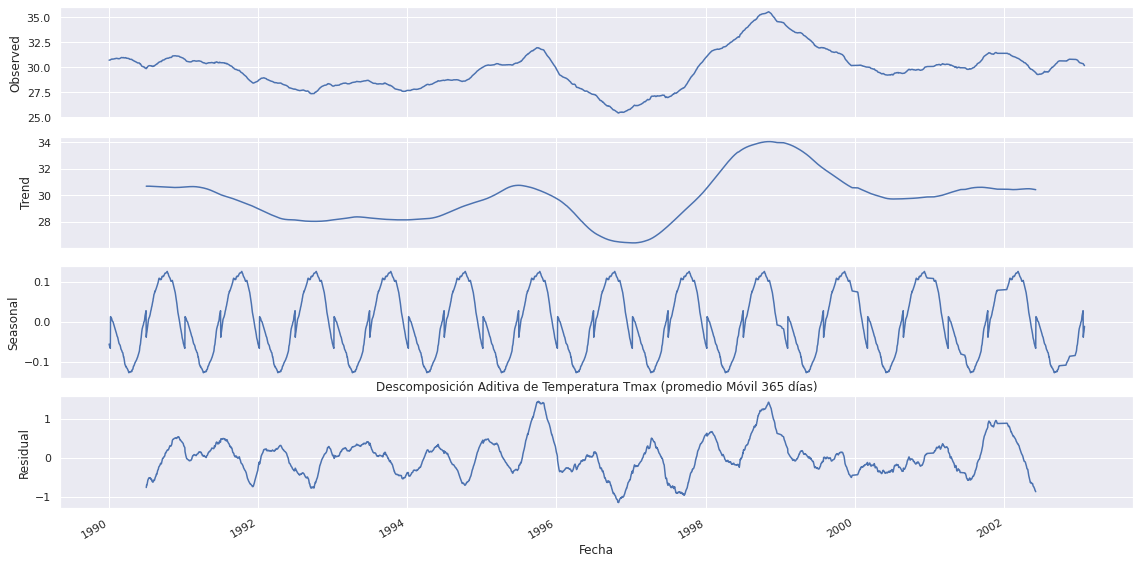

In [75]:
#Caso: promedio anual
sb.set(rc={'figure.figsize':(16,8)})

inicio, fin = '1990-01', '2003-01'
decomp=365

descTmax=sm.tsa.seasonal_decompose(df_meteo90_M365d.loc[inicio:fin, 'Tmax'].interpolate(), freq=decomp, model='additive')
descTmax.plot()
plt.title('Descomposición Aditiva de Temperatura Tmax (promedio Móvil 365 días)')
plt.xlabel('Fecha')

Text(0.5, 79.03974596215559, 'Fecha')

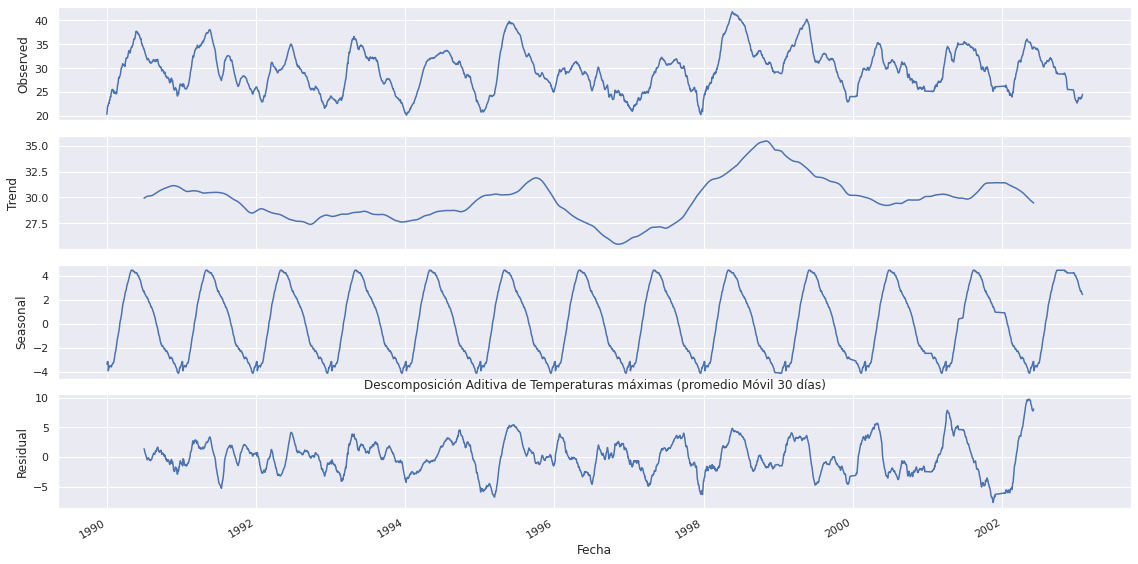

In [76]:
#Caso: promedio mensual
sb.set(rc={'figure.figsize':(16,8)})

inicio, fin = '1990-01', '2003-01'
decomp=365

descTmax=sm.tsa.seasonal_decompose(df_meteo90_M30d.loc[inicio:fin, 'Tmax'].interpolate(), freq=decomp, model='additive')
descTmax.plot()
plt.title('Descomposición Aditiva de Temperaturas máximas (promedio Móvil 30 días)')
plt.xlabel('Fecha')

Text(0.5, 79.03974596215559, 'Fecha')

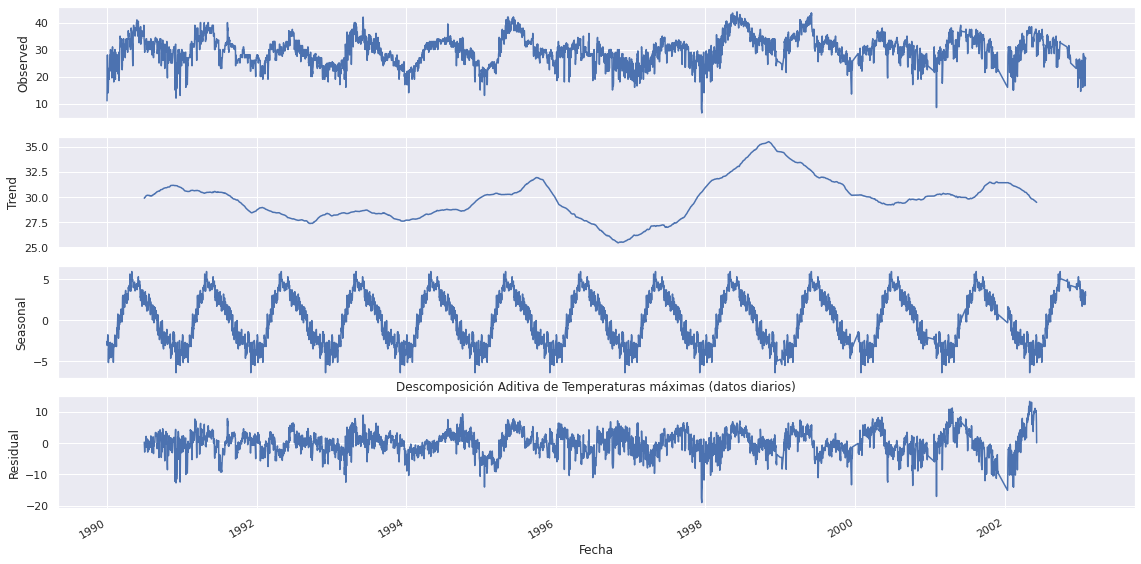

In [81]:
#Caso: datos diarios
sb.set(rc={'figure.figsize':(16,8)})

inicio, fin = '1990-01', '2003-01'
decomp=365

descTmax=sm.tsa.seasonal_decompose(df_meteo90.loc[inicio:fin, 'Tmax'].interpolate(), freq=decomp, model='additive')
descTmax.plot()
plt.title('Descomposición Aditiva de Temperaturas máximas (datos diarios)')
plt.xlabel('Fecha')

# ***Temperatura Mínima***

Text(0.5, 79.03974596215559, 'Fecha')

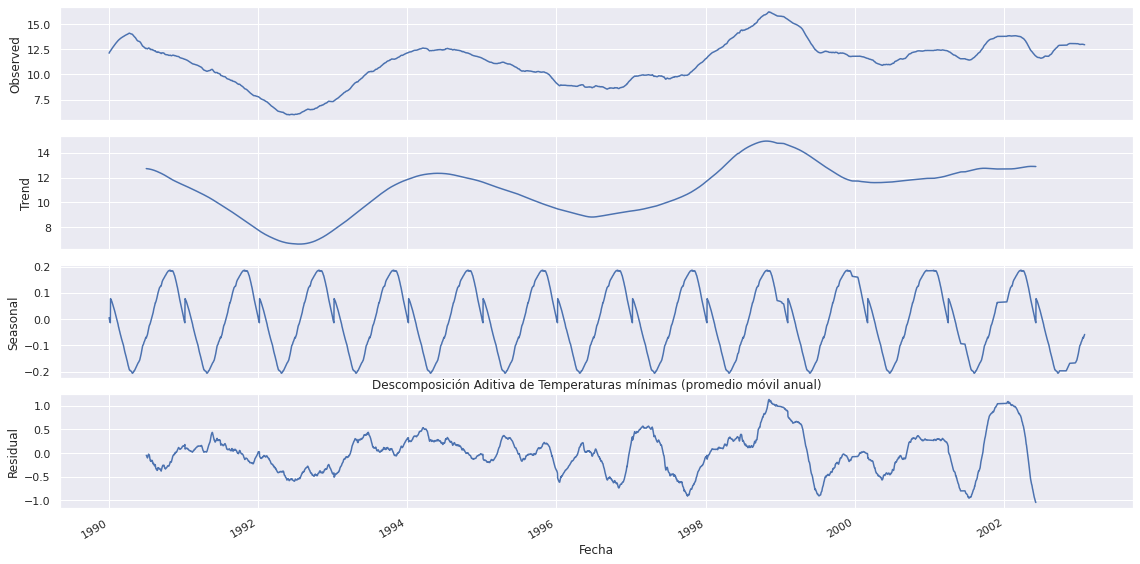

In [85]:
#Caso: promedio anual
sb.set(rc={'figure.figsize':(16,8)})

inicio, fin = '1990-01', '2003-01'
decomp=365

descTmin=sm.tsa.seasonal_decompose(df_meteo90_M365d.loc[inicio:fin, 'Tmin'].interpolate(), freq=decomp, model='additive')
descTmin.plot()
plt.title('Descomposición Aditiva de Temperaturas mínimas (promedio móvil anual)')
plt.xlabel('Fecha')

Text(0.5, 79.03974596215559, 'Fecha')

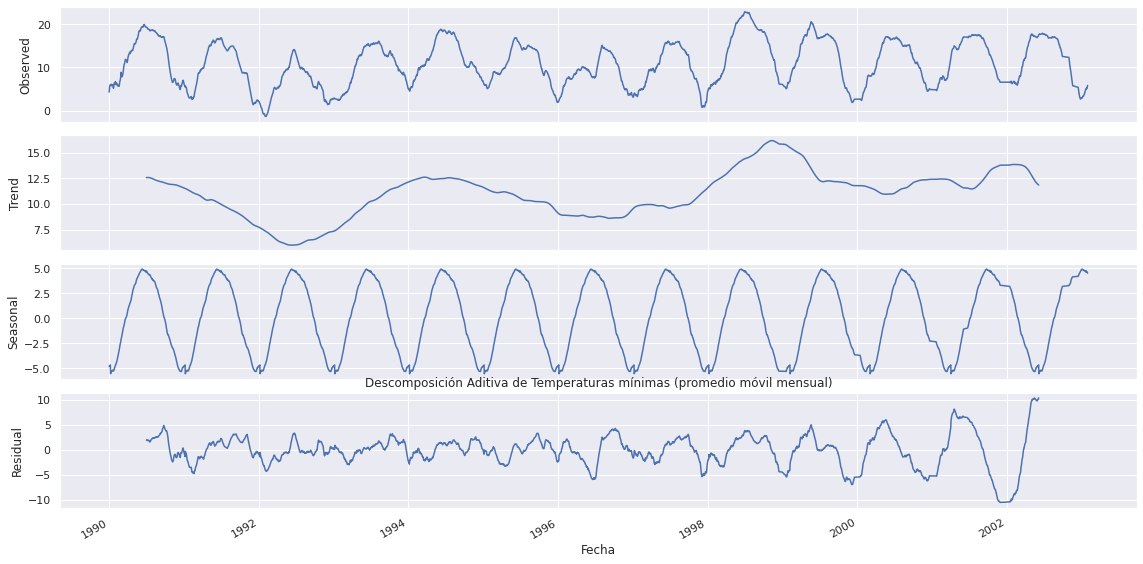

In [87]:
#Caso: promedio mensual
sb.set(rc={'figure.figsize':(16,8)})

inicio, fin = '1990-01', '2003-01'
decomp=365

descTmin=sm.tsa.seasonal_decompose(df_meteo90_M30d.loc[inicio:fin, 'Tmin'].interpolate(), freq=decomp, model='additive')
descTmin.plot()
plt.title('Descomposición Aditiva de Temperaturas mínimas (promedio móvil mensual)')
plt.xlabel('Fecha')

Text(0.5, 79.03974596215559, 'Fecha')

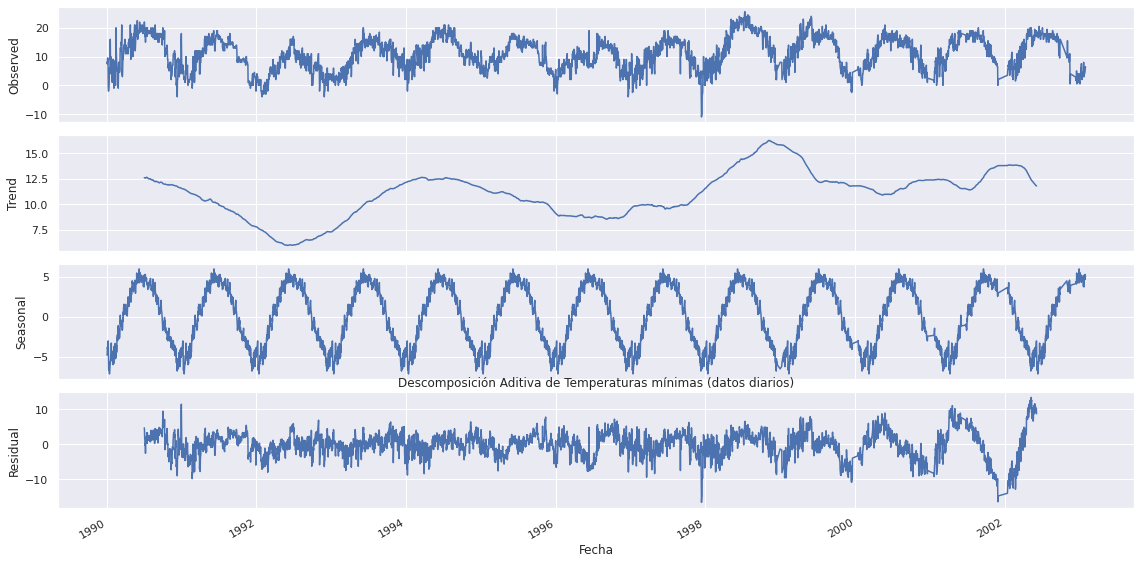

In [84]:
#Caso: datos diarios
sb.set(rc={'figure.figsize':(16,8)})

inicio, fin = '1990-01', '2003-01'
decomp=365

descTmin=sm.tsa.seasonal_decompose(df_meteo90.loc[inicio:fin, 'Tmin'].interpolate(), freq=decomp, model='additive')
descTmin.plot()
plt.title('Descomposición Aditiva de Temperaturas mínimas (datos diarios)')
plt.xlabel('Fecha')

In [92]:
# Dado que la estación cuenta, solamente, con 32 años de datos, dividimos los datos en 3 grupos de 10.
columnas=['Precip','Evap','Tmax','Tmin','Año','Mes']
df_81=df_meteo_ti[(df_meteo_ti['Año']>=1981) & (df_meteo_ti['Año']<1991)]
df_91=df_meteo_ti[(df_meteo_ti['Año']>=1991) & (df_meteo_ti['Año']<2001)]
df_01=df_meteo_ti[(df_meteo_ti['Año']>=2001) & (df_meteo_ti['Año']<2011)]
df_81.columns=columnas
df_91.columns=columnas
df_01.columns=columnas

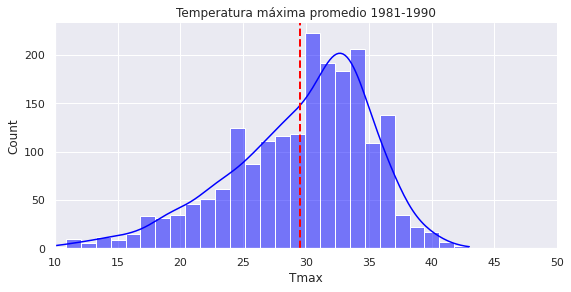

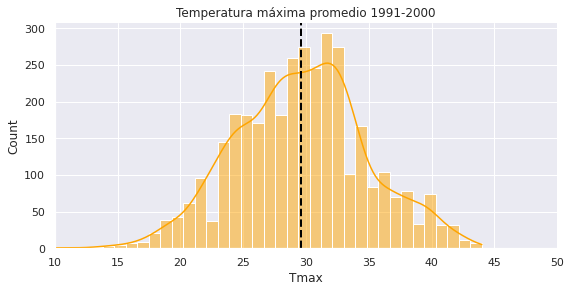

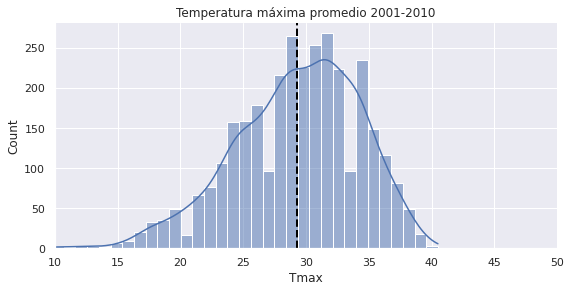

Tmax_promedio df_81 =  29.548446893787577 ºC
Tmax_promedio df_91 =  29.595104895104893 ºC
Tmax_promedio df_01 =  29.293428394296345 ºC


In [98]:
# Gráficas de distribución de Temperaturas máximas
g1 = sb.displot(df_81['Tmax'], kde=True, color='blue', height=4, aspect=2)
plt.axvline(df_81['Tmax'].mean(), linestyle='--', linewidth=2, color='red')

g2 = sb.displot(df_91.Tmax, kde=True, color='orange', height=4, aspect=2)
plt.axvline(df_91.Tmax.mean(), linestyle='--', linewidth=2, color='black')

g3 = sb.displot(df_01.Tmax, kde=True, height=4, aspect=2)
plt.axvline(df_01.Tmax.mean(), linestyle='--', linewidth=2, color='black')

g1.set(title='Temperatura máxima promedio 1981-1990')
g2.set(title='Temperatura máxima promedio 1991-2000')
g3.set(title='Temperatura máxima promedio 2001-2010')
g1.set(xlim=(10,50))
g2.set(xlim=(10,50))
g3.set(xlim=(10,50))

plt.show()

print('Tmax_promedio df_81 = ', df_81['Tmax'].mean(), 'ºC' )
print('Tmax_promedio df_91 = ', df_91['Tmax'].mean(), 'ºC' )
print('Tmax_promedio df_01 = ', df_01['Tmax'].mean(), 'ºC' )

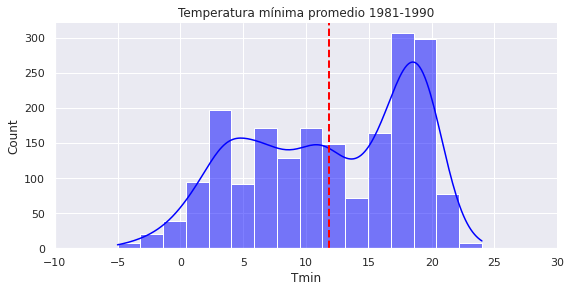

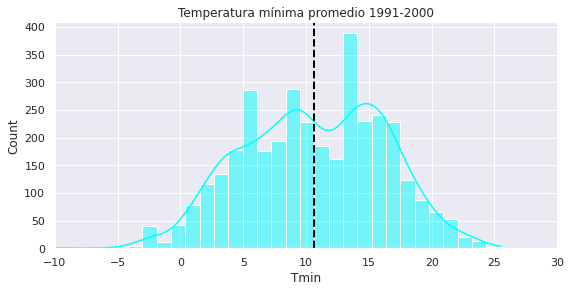

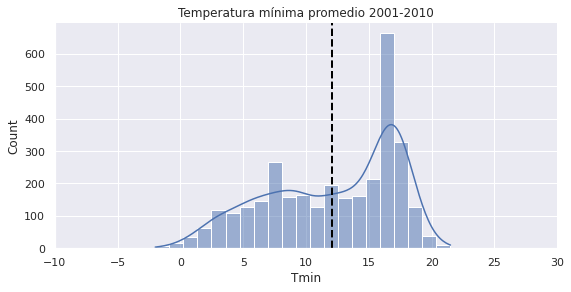

Tmin_promedio df_81 =  11.865747241725176 ºC
Tmin_promedio df_91 =  10.648071548351036 ºC
Tmin_promedio df_01 =  12.075302138208862 ºC


In [97]:
# Gráficas de distribución de Temperaturas mínimas
g1 = sb.displot(df_81['Tmin'], kde=True, color='blue', height=4, aspect=2)
plt.axvline(df_81['Tmin'].mean(), linestyle='--', linewidth=2, color='red')

g2 = sb.displot(df_91.Tmin, kde=True, color='cyan', height=4, aspect=2)
plt.axvline(df_91.Tmin.mean(), linestyle='--', linewidth=2, color='black')

g3 = sb.displot(df_01.Tmin, kde=True, height=4, aspect=2)
plt.axvline(df_01.Tmin.mean(), linestyle='--', linewidth=2, color='black')

g1.set(title='Temperatura mínima promedio 1981-1990')
g2.set(title='Temperatura mínima promedio 1991-2000')
g3.set(title='Temperatura mínima promedio 2001-2010')
g1.set(xlim=(-10,30))
g2.set(xlim=(-10,30))
g3.set(xlim=(-10,30))

plt.show()

print('Tmin_promedio df_81 = ', df_81['Tmin'].mean(), 'ºC' )
print('Tmin_promedio df_91 = ', df_91['Tmin'].mean(), 'ºC' )
print('Tmin_promedio df_01 = ', df_01['Tmin'].mean(), 'ºC' )